In [148]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [156]:
%%R
library(tidyverse)

In [157]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv("../this-is-the-one/2018_padro_nacionalitat_per_sexe.csv")
head(barris)
glimpse(barris)

Observations: 7,446
Variables: 8
$ Any            <int> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018...
$ Codi_Districte <int> 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3...
$ Nom_Districte  <chr> "Ciutat Vella", "Ciutat Vella", "Ciutat Vella", "Ciu...
$ Codi_Barri     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1...
$ Nom_Barri      <chr> "el Raval", "el Barri Gòtic", "la Barceloneta", "San...
$ Sexe           <chr> "Home", "Home", "Home", "Home", "Home", "Home", "Hom...
$ Nacionalitat   <chr> "Espanya", "Espanya", "Espanya", "Espanya", "Espanya...
$ Nombre         <int> 11732, 4214, 4607, 6235, 11532, 18692, 15761, 15241,...


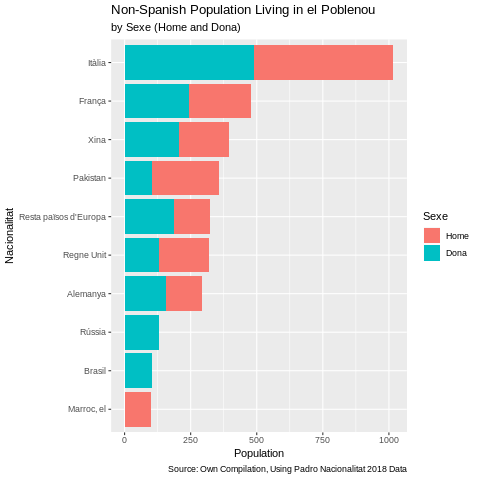

In [158]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>%
        dplyr::filter(Nom_Barri == "el Poblenou") %>%
        dplyr::filter(Nacionalitat != "Espanya") %>%  
        group_by(Nacionalitat, Sexe) %>%  
        summarise(count = sum(Nombre)) %>% 
        filter(count > 100) %>% 
        ggplot (aes(x = reorder(Nacionalitat, count), y = count, fill = Sexe)) +
        geom_col() +
        coord_flip() +
        labs(title = "Non-Spanish Population Living in el Poblenou", 
        subtitle = "by Sexe (Home and Dona)", 
        caption = "Source: Own Compilation. Padro Nacionalitat 2018 Data") +  # title and caption+
        xlab("Nacionalitat") +
        ylab("Population")


# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 

# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# Problem 3: Classes in Python

In [159]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

In [161]:
import numpy as np

class RandomClassifier:
    def __init__(self, probability):
        self.probability = probability
    
    def predict(self, x):
        return np.random.binomial(size = 1, n = 1, p = self.probability)

 
r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

A pure function is a function which:
- Given the same input, will always return the same output.
- Produces no side effects.

Their strengths are:
- Pure functions are more composable or modular
- Pure functions are easy to test and refactor
- Pure functions are memoizable
- Pure functions can be lazy (see next question)

### What is lazy evaluation and when might you use it? (2-3 lines)

In programming language theory, lazy evaluation, is an evaluation strategy which delays the evaluation of an expression until its value is needed and which also avoids repeated evaluations. This can reduce the running time of certain functions by an exponential factor over other non-strict evaluation strategies, such as call-by-name.

The benefits of lazy evaluation include:
- The ability to define control flow (structures) as abstractions instead of primitives.
- The ability to define potentially infinite data structures. This allows for more straightforward implementation of some algorithms.
- Performance increases by avoiding needless calculations, and error conditions in evaluating compound expressions.

[Source: https://en.wikipedia.org/wiki/Lazy_evaluation]